                        API Data Fetching & Processing in Python
I worked with the API-FOOTBALL service to fetch and analyze Premier League player data using Python.

In [55]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

We used the requests library to make GET requests to API endpoints.

In [ ]:
url = "https://v3.football.api-sports.io/players/topscorers?season=2023&league=39"

params = {
    "league": "39",   # Premier League ID
    "season": "2023"  # Season 2023
}

headers = {
    'x-rapidapi-key': 'XxxxxxX', # Your API key  
    'x-rapidapi-host': 'v3.football.api-sports.io'
}

# Make the GET request
response = requests.get(url, headers=headers, params=params)

data = response.json()
player_data = pd.json_normalize(data["response"], 
    record_path=["statistics"], 
    meta=[["player", "name"], ["player", "age"], ["player", "nationality"]],
    errors="ignore"
)

I used the json_normalize() to convert the nested JSON response into a Pandas DataFrame for easier manipulation.

In [34]:
player_data

,team.id,team.name,team.logo,league.id,league.name,league.country,league.logo,league.flag,league.season,games.appearences,...,cards.yellowred,cards.red,penalty.won,penalty.commited,penalty.scored,penalty.missed,penalty.saved,player.name,player.age,player.nationality
0,50,Manchester City,https://media.api-sports.io/football/teams/50.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,31,...,0,0,None,None,7,1,None,E. Haaland,25,Norway
1,49,Chelsea,https://media.api-sports.io/football/teams/49.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,33,...,0,0,None,None,9,0,None,C. Palmer,23,England
2,34,Newcastle,https://media.api-sports.io/football/teams/34.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,30,...,0,0,None,None,5,1,None,A. Isak,26,Sweden
3,66,Aston Villa,https://media.api-sports.io/football/teams/66.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,37,...,0,0,None,None,0,0,None,O. Watkins,30,England
4,50,Manchester City,https://media.api-sports.io/football/teams/50.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,35,...,0,0,None,None,0,0,None,P. Foden,25,England
5,35,Bournemouth,https://media.api-sports.io/football/teams/35.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,38,...,0,0,None,None,2,1,None,D. Solanke,28,England
6,40,Liverpool,https://media.api-sports.io/football/teams/40.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,32,...,0,0,None,None,5,2,None,Mohamed Salah,33,Egypt
7,47,Tottenham,https://media.api-sports.io/football/teams/47.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,35,...,0,0,None,None,2,0,None,Son Heung-Min,33,Korea Republic
8,48,West Ham,https://media.api-sports.io/football/teams/48.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,34,...,0,0,None,None,0,0,None,J. Bowen,29,England
9,52,Crystal Palace,https://media.api-sports.io/football/teams/52.png,39,Premier League,England,https://media.api-sports.io/football/leagues/3...,https://media.api-sports.io/flags/gb-eng.svg,2023,35,...,0,0,None,None,2,0,None,J. Mateta,28,France


In [35]:
player_data["team.name"]

0       Manchester City
1               Chelsea
2             Newcastle
3           Aston Villa
4       Manchester City
5           Bournemouth
6             Liverpool
7             Tottenham
8              West Ham
9        Crystal Palace
10              Arsenal
11              Chelsea
12    Nottingham Forest
13              Arsenal
14            Brentford
15              Arsenal
16               Wolves
17               Wolves
18            Liverpool
19            Tottenham
Name: team.name, dtype: object

In [40]:
player_age = player_data["player.age"].astype(int)
player_age

0     25
1     23
2     26
3     30
4     25
5     28
6     33
7     33
8     29
9     28
10    24
11    24
12    34
13    26
14    29
15    31
16    26
17    29
18    26
19    28
Name: player.age, dtype: int64

In [42]:
player_age.mean()

np.float64(27.85)

In [49]:
quantile1 = player_age.quantile(0.25)
print(f"The lower quantile: {quantile1}")

quantile2 = player_age.quantile(0.5)
print(f"The median: {quantile2}")

quantile3 = player_age.quantile(0.75)
print(f"The upper quantile: {quantile3}")

# Calculate IQR (Interquartile Range)
IQR = quantile3 - quantile1
print(f"The Interquartile Range: {IQR}")


The lower quantile: 25.75
The median: 28.0
The upper quantile: 29.25
The Interquartile Range: 3.5


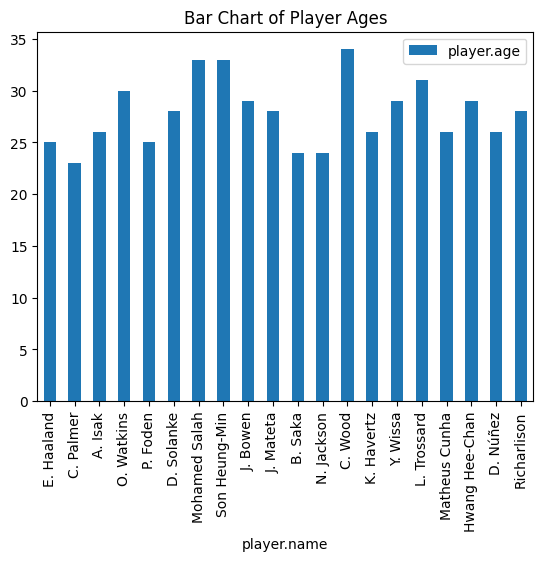

In [57]:
player_data.plot(kind="bar", x="player.name", y="player.age", title="Bar Chart of Player Ages")
plt.show()